## Determining the factors affecting the flight delay

Dataset - Flight Delay

Dataset taken from below link.

https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/data

The dataset contains execution of U.S. carriers at different air terminals amid Eminent 2013 - Eminent 2023, centering on flight entries and delays. The key variable are as follows:

*year: The year of the data. *month: The month of the data. *carrier: Carrier code. *carrier_name: Carrier name. *airport: Airport code. *airport_name: Airport name. *arr_flights: Number of arriving flights. *arr_del15: Number of flights delayed by 15 minutes or more. *carrier_ct: Carrier count (delay due to the carrier). *weather_ct: Weather count (delay due to weather). *nas_ct: NAS (National Airspace System) count (delay due to the NAS). *security_ct: Security count (delay due to security). *late_aircraft_ct: Late aircraft count (delay due to late aircraft arrival). *arr_cancelled: Number of flights canceled. *arr_diverted: Number of flights diverted. *arr_delay: Total arrival delay. *carrier_delay: Delay attributed to the carrier. *weather_delay: Delay attributed to weather. *nas_delay: Delay attributed to the NAS. *security_delay: Delay attributed to security. *late_aircraft_delay: Delay attributed to late aircraft arrival



#### Problem to analyse

The problem identified as to find the factors influencing the flight delay with provided details. This will help to predict and optimise the better operational strategies to reduce the delay time and avoid any congestion in effective way.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.model_selection import KFold

In [4]:
# Reading the dataset
Initial_data=pd.read_csv("D:/AIML Project/Airline_Delay_Cause.csv")

In [5]:
# To identify the number of rows and columns of the dataset
Initial_data.shape

(171666, 21)

In [7]:
Initial_data.head() # To find the headers of the dataset

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


The dataset contains 171666 rows and 21 columns. Columns carrier, carrier_name, airport,airport_name contains alphanumeric values. The rest of the columns contain numeric data.

#### Data Preprocessing

##### Identifying the missing values

In [8]:
# To find the count of missing values in the datset under each column.
no_missingvalues=Initial_data.isnull().sum()
no_missingvalues

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

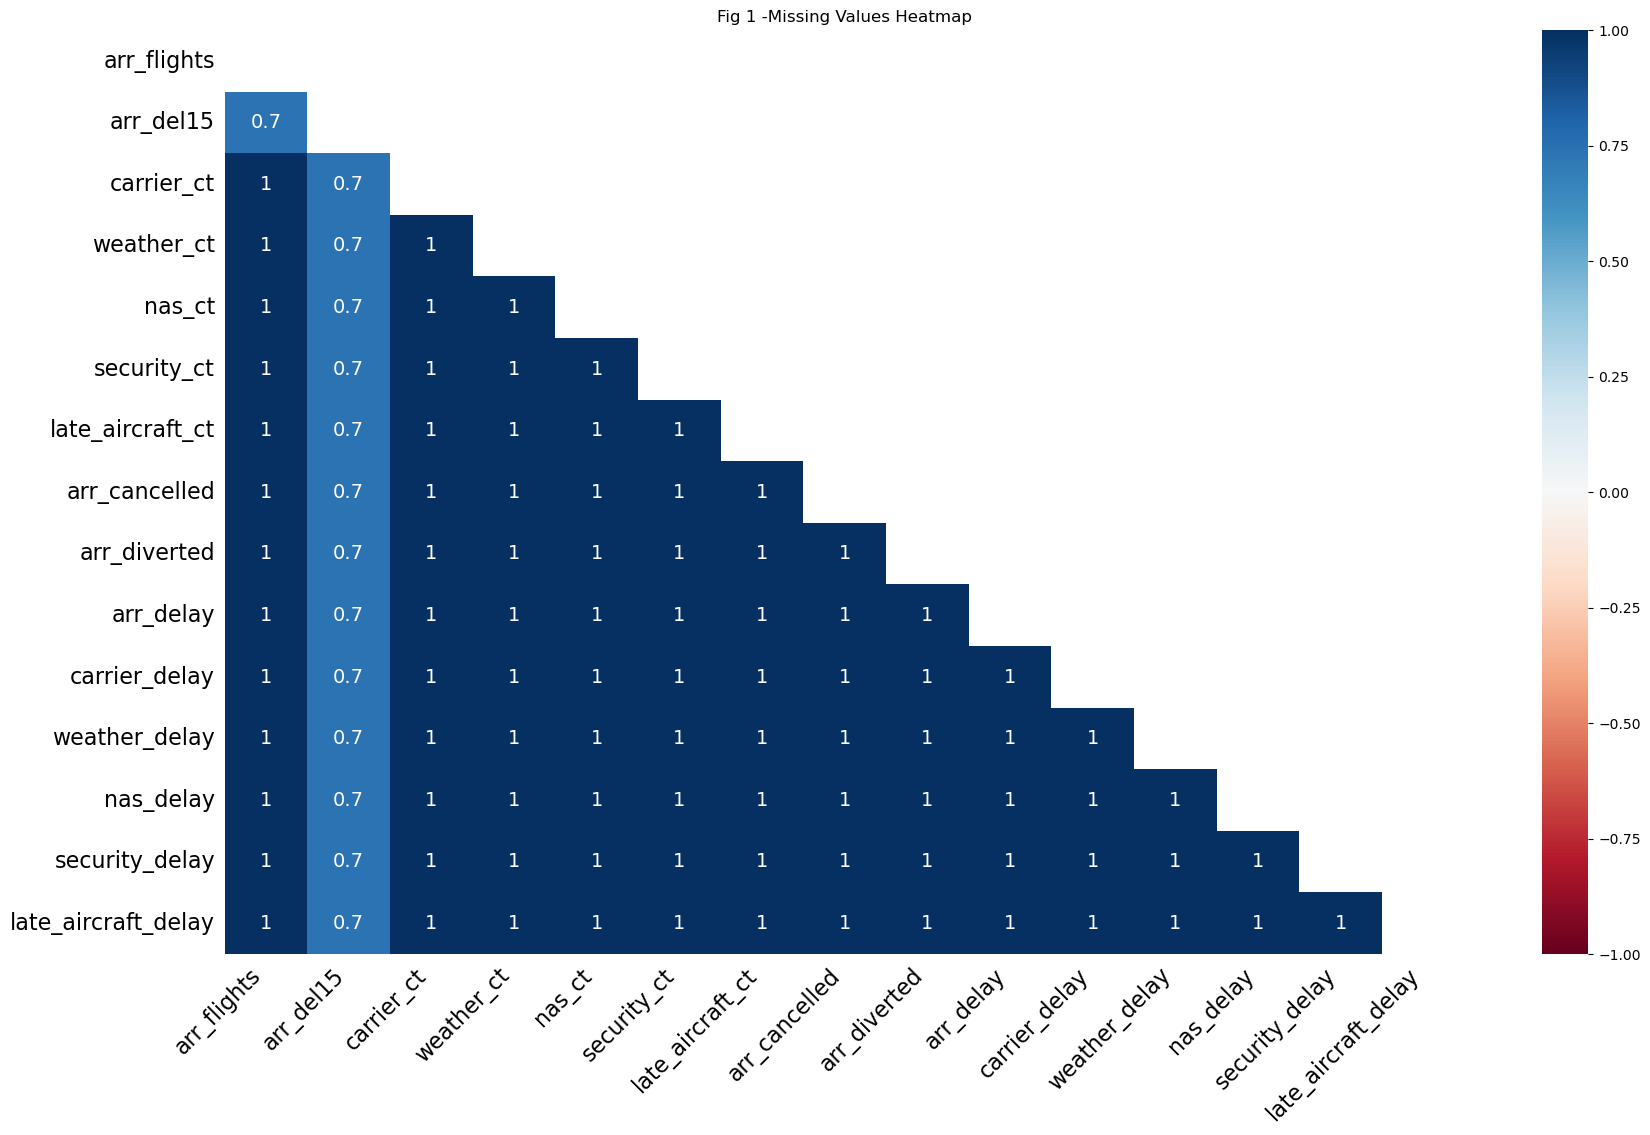

In [7]:
msno.heatmap(Initial_data)# heatmap to show the missing value ratio in each columns.
plt.figure(num=1, figsize=(8, 6))
plt.title('Fig 1 -Missing Values Heatmap')
plt.show()

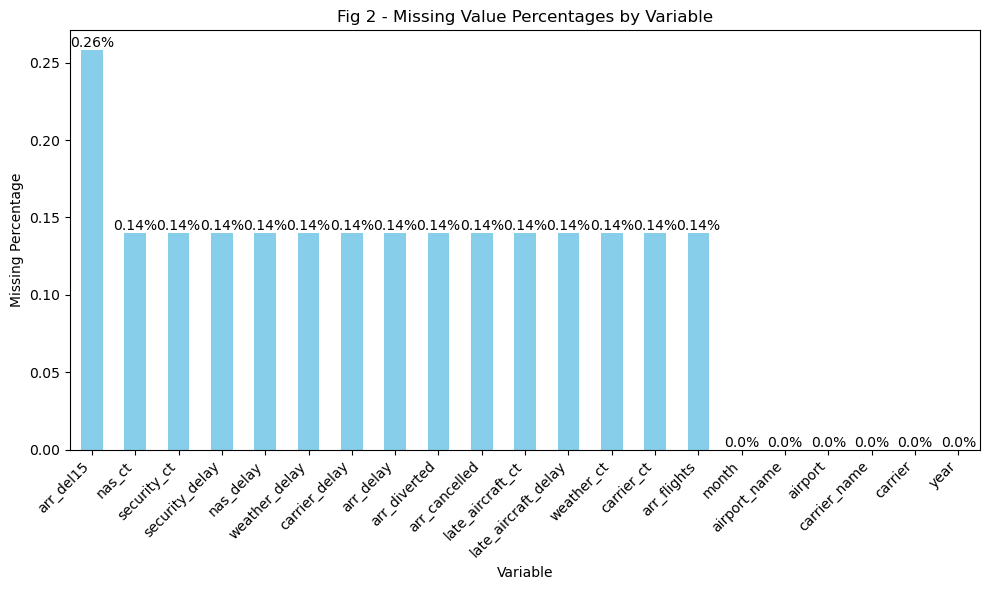

In [9]:
# Visualising the percentage of missing values contributed by each column to have better understanding of the data.
# Define the missing value counts
missing_values = {
    'year': 0,
    'month': 0,
    'carrier': 0,
    'carrier_name': 0,
    'airport': 0,
    'airport_name': 0,
    'arr_flights': 240,
    'arr_del15': 443,
    'carrier_ct': 240,
    'weather_ct': 240,
    'nas_ct': 240,
    'security_ct': 240,
    'late_aircraft_ct': 240,
    'arr_cancelled': 240,
    'arr_diverted': 240,
    'arr_delay': 240,
    'carrier_delay': 240,
    'weather_delay': 240,
    'nas_delay': 240,
    'security_delay': 240,
    'late_aircraft_delay': 240
}

# Convert to DataFrame
df_missing_values = pd.DataFrame.from_dict(missing_values, orient='index', columns=['Missing Values'])

# Calculate missing value percentages
total_rows = 171666
df_missing_values['Missing Percentage'] = (df_missing_values['Missing Values'] / total_rows) * 100

# Sort the DataFrame by missing percentage
df_missing_values.sort_values(by='Missing Percentage', ascending=False, inplace=True)

# Plotting
plt.figure(num=2,figsize=(10, 6))
df_missing_values['Missing Percentage'].plot(kind='bar', color='skyblue')
plt.title('Fig 2 - Missing Value Percentages by Variable')
plt.xlabel('Variable')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(df_missing_values['Missing Percentage']):
    plt.text(index, value, f'{value:.2}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [10]:
# KNN inputation method to fill the missing values

# Identify non-numeric columns to encode to numeric values
non_numeric_cols = Initial_data.select_dtypes(exclude=['number']).columns

# Label encode non-numeric columns(carrier, carrier_name,airport,airport_name)
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    Initial_data[col] = label_encoder.fit_transform(Initial_data[col])

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = imputer.fit_transform(Initial_data)

# Convert the imputed data back to a DataFrame (if needed)
imputed_df = pd.DataFrame(imputed_data, columns=Initial_data.columns)

imputed_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023.0,8.0,0.0,6.0,0.0,10.0,89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023.0,8.0,0.0,6.0,4.0,6.0,62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023.0,8.0,0.0,6.0,11.0,9.0,62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023.0,8.0,0.0,6.0,12.0,21.0,66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023.0,8.0,0.0,6.0,14.0,7.0,92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013.0,8.0,19.0,14.0,371.0,46.0,7.0,1.0,0.78,0.00,...,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013.0,8.0,19.0,14.0,394.0,418.0,2.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013.0,8.0,19.0,14.0,347.0,336.0,2.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013.0,8.0,4.0,5.0,329.0,361.0,1.0,1.0,1.00,0.00,...,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


The missing data values are found majority in column arr_del15 and rest are equally distributed in nas_ct, security_ct, security_delay,nas_delay,weather_delay,carrier_delay,arr_delay,arr_diverted,arr_cancelled,late_aircraft_ct,late_aircraft_delay,
weather_ct,carrier_ct,arr_flights. Columns month,airport_name,airport,carrier_name_carrier, year has no null values. As part of data preprocessing, removing the missing values is important to streamline the data, and avoid data manipulation, the sample size for training data, and uninterrupted values across the dataset to avoid any further model failures or non-responsiveness.

Since the dataset is persistent and numeric and there exists a relationship between different variables(columns), lost values are not regularly dispersed, The KNN ascription strategy is utilized to fill within the lost values within the dataset. This makes the dataset more optimized and can handle skewed conveyed information. KNN ascription strategy calculates the values of a lost information point based on the values of its closest neighbors on include arrange. 

In [12]:
imputed_df.info() # Ensuring the datatype of each column in the imputed_df dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  float64
 1   month                171666 non-null  float64
 2   carrier              171666 non-null  float64
 3   carrier_name         171666 non-null  float64
 4   airport              171666 non-null  float64
 5   airport_name         171666 non-null  float64
 6   arr_flights          171666 non-null  float64
 7   arr_del15            171666 non-null  float64
 8   carrier_ct           171666 non-null  float64
 9   weather_ct           171666 non-null  float64
 10  nas_ct               171666 non-null  float64
 11  security_ct          171666 non-null  float64
 12  late_aircraft_ct     171666 non-null  float64
 13  arr_cancelled        171666 non-null  float64
 14  arr_diverted         171666 non-null  float64
 15  arr_delay        

Now, the new dataset has no null values and all data is changed to float using the label encoding method.

##### To remove the outliers using winsoring method

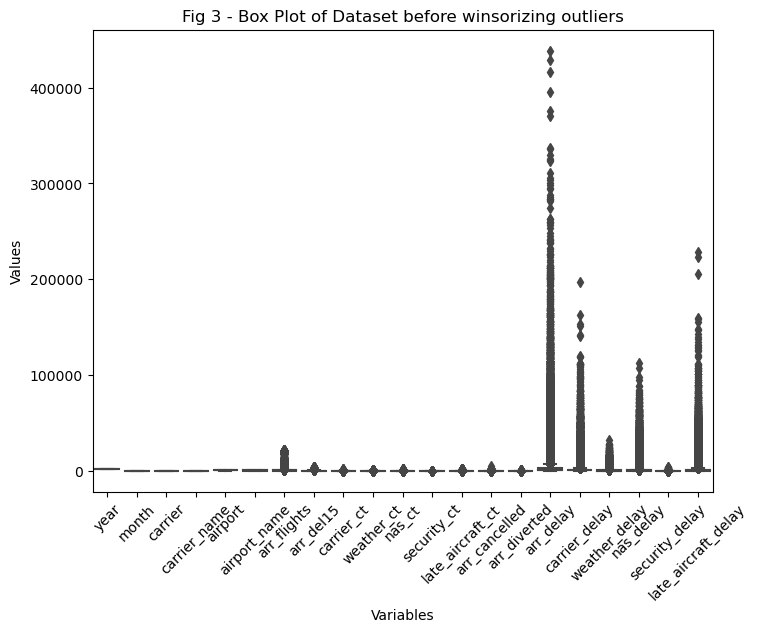

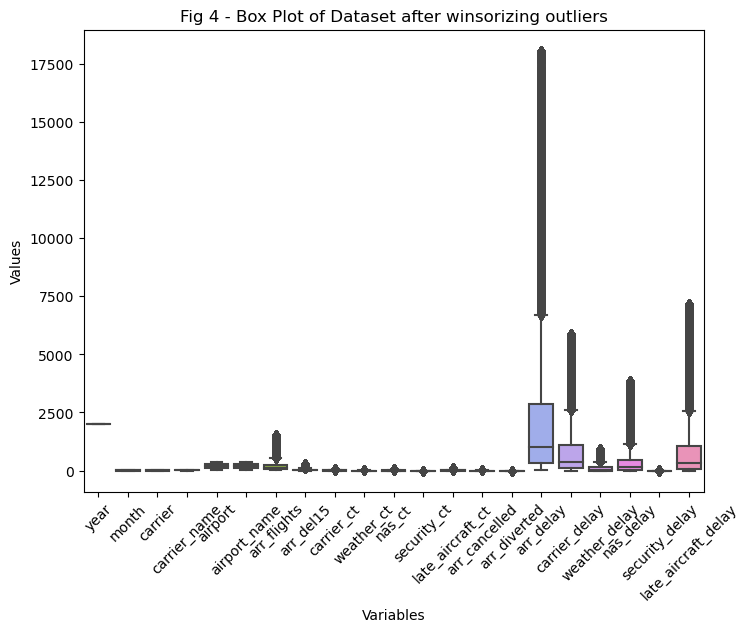

In [13]:
# Winsorized technique used to reduce outliers
winsorized_df = imputed_df.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

# Boxplot to show the outliers of dataset before implementing winsorizing method.
plt.figure(num=3,figsize=(8, 6))
sns.boxplot(data=imputed_df)
plt.title('Fig 3 - Box Plot of Dataset before winsorizing outliers')
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# Boxplot to show the outliers of dataset after implementing winsorizing method.
data = winsorized_df
plt.figure(num=4,figsize=(8, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Fig 4 - Box Plot of Dataset after winsorizing outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

When the data is scattered in a dataset, it is very hard to analyze or interpret them, we cannot omit the outliers as they are as they impact the model performance. especially whether there exists a relationship between multiple variables. Effectively handling outliers will enhance the data quality as well as all information is preserved. The winsorizing technique has been used as the data is very sensitive and shows multivariate relationships, to handle the sensitivity of the data the extreme values of the lowest and highest 5% have been replaced with 5th and 95th percentile values.winsorized_df data frame contains the transformed data with winsorized outliers. The boxplot shows before and after the winsorizing method used. This shows how the outliers are capped in without affecting the data quality.

#### Exploratory Data Analysis

Here we analyze the pre-processed data to under the patterns, relationships, and structure between the features and target.

In [14]:
#Correlation matrix

# Calculate the correlation matrix
correlation_matrix = winsorized_df.corr()

# Print the correlation matrix
print(correlation_matrix)



                         year     month   carrier  carrier_name   airport  \
year                 1.000000 -0.128792  0.070531     -0.000147  0.000449   
month               -0.128792  1.000000 -0.003871     -0.002181 -0.000887   
carrier              0.070531 -0.003871  1.000000      0.798343 -0.006843   
carrier_name        -0.000147 -0.002181  0.798343      1.000000 -0.002623   
airport              0.000449 -0.000887 -0.006843     -0.002623  1.000000   
airport_name        -0.004073 -0.000686  0.004549      0.005093  0.763690   
arr_flights         -0.064080  0.005471  0.079996      0.107504  0.015541   
arr_del15           -0.067186 -0.000815  0.077518      0.114410  0.013622   
carrier_ct          -0.038960  0.002115  0.070576      0.119287  0.020808   
weather_ct          -0.015663 -0.029139  0.057863      0.065803 -0.006158   
nas_ct              -0.088918 -0.005063  0.009004      0.060257  0.003259   
security_ct          0.031597  0.008438  0.038534      0.056295  0.005400   

<Figure size 500000x20000 with 0 Axes>

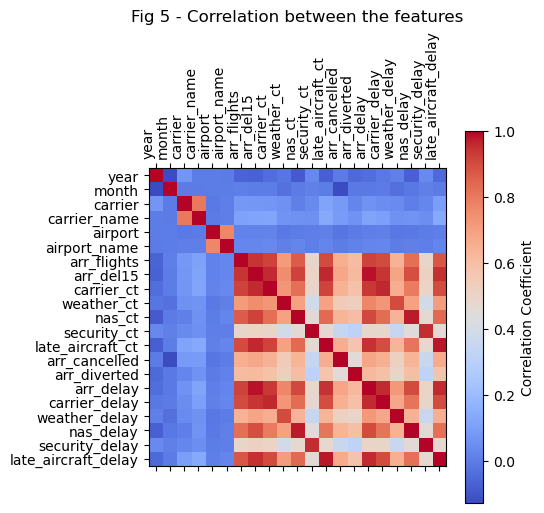

In [15]:
#Visualisation of correlation matrix depicting the relationship between the variables.

# Create a new figure for plotting
plt.figure(num=5,figsize=(5000, 200))

# Create a heatmap from the correlation matrix
ax = plt.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
plt.colorbar(ax, label='Correlation Coefficient')

# Add column labels (truncated if too long)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Fig 5 - Correlation between the features')

# Adjust spacing for better visualization
plt.tight_layout()

# Show the plot
plt.show()

The above correlation matrix and heatmap show the relationship between different columns. This helps to understand the multiple relationships between the variables in the dataset.

*arr_flights,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay, security_delay, and late_aircraft_delay appear positive relationships with arr_delay.


*month and year have moderately moo relationships with arr_delay, demonstrating that they might not have a solid direct relationship with the target variable.

*carrier and carrier_name appear direct relationships with arr_delay, proposing that the carrier working the flight may impact delays.

*airplane terminal and airport_name have frail relationships with 'arr_delay', showing that the particular air terminal might have a constrained coordinate affect on delays. 


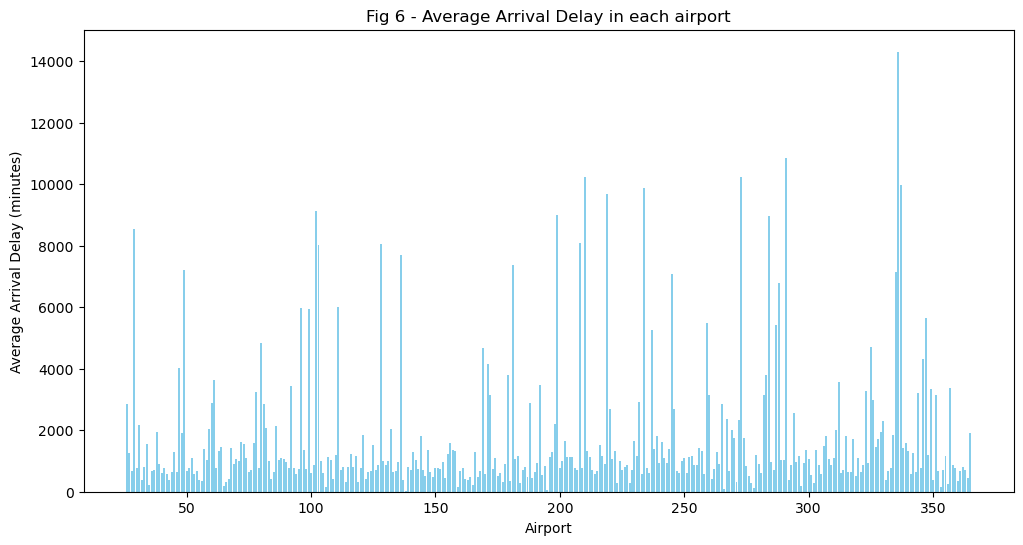

In [16]:
# Calculate average delay by airport
avg_delays = winsorized_df.groupby('airport')['arr_delay'].mean().reset_index()

# Sort the airports by delay for better visualization
avg_delays = avg_delays.sort_values(by='arr_delay')

# Create a bar chart
plt.figure(num=6,figsize=(12, 6))
plt.bar(avg_delays['airport'], avg_delays['arr_delay'], color='skyblue')
plt.title('Fig 6 - Average Arrival Delay in each airport')
plt.xlabel('Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()


The above graph shows the pattern of average arrival delay of flights in airports across the years 2013 to 2023. There exists a continuous, seasonal pattern exists across the airports.

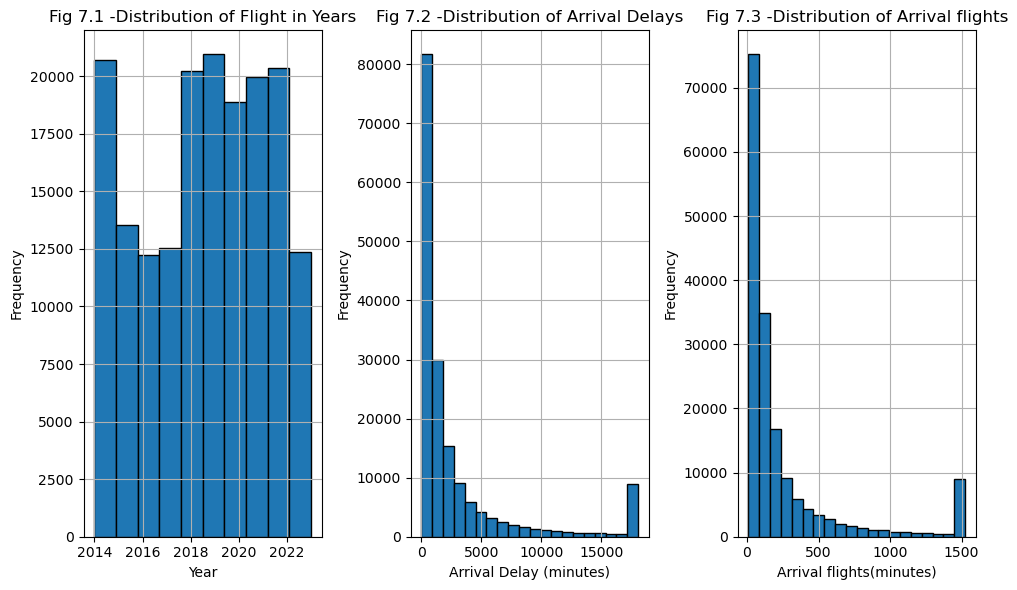

In [17]:
# Create separate figures for each histogram
plt.figure(num=7,figsize=(10, 6))

# Histogram for year
plt.subplot(1, 3, 1)  # First subplot (left side)
plt.hist(winsorized_df['year'], bins=10, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Fig 7.1 -Distribution of Flight in Years')
plt.grid(True)

# Histogram for arr_delay
plt.subplot(1, 3, 2)  # Second subplot (right side)
plt.hist(winsorized_df['arr_delay'], bins=20, edgecolor='black')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Fig 7.2 -Distribution of Arrival Delays')
plt.grid(True)


# Histogram for arr_flights
plt.subplot(1, 3, 3)# Third subplot
plt.hist(winsorized_df['arr_flights'], bins=20, edgecolor='black')
plt.xlabel('Arrival flights(minutes)')
plt.ylabel('Frequency')
plt.title('Fig 7.3 -Distribution of Arrival flights')
plt.grid(True)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the combined plot
plt.show()

The above Fig 7.1,7.2 & 7.3 shows the distribution of data or the trend over the 10 years of data. Arrival delays and arrival flights are directly related to each other showing a similar graph scale over the period. Fig 7.1 shows the flight pattern over the years, a trend change in each year.

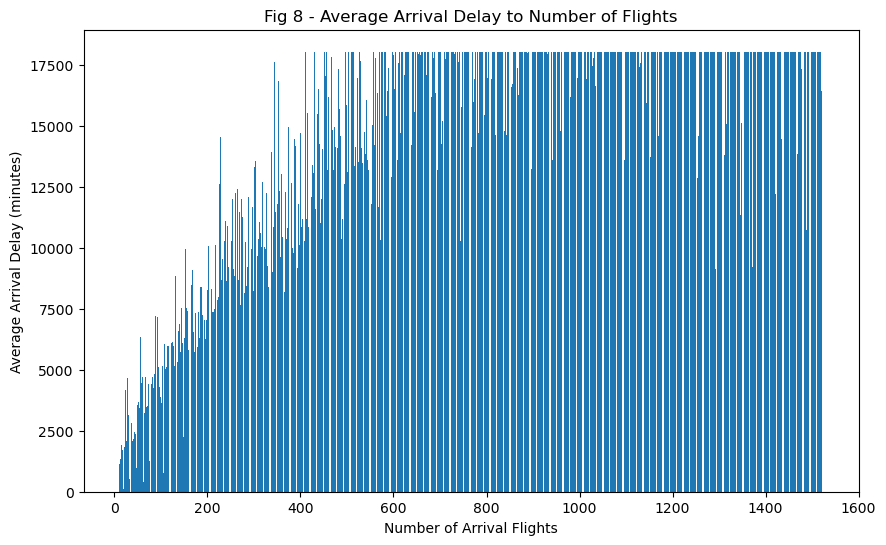

In [18]:
# plot to show relationship between average arrival delay to no. of flights
plt.figure(num=8,figsize=(10, 6))
plt.bar(winsorized_df['arr_flights'], winsorized_df['arr_delay'])  # Group by 'arr_flights'
plt.xlabel('Number of Arrival Flights')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Fig 8 - Average Arrival Delay to Number of Flights')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Fig 8 shows when the number of arrival flights is higher there is a high delay in arrival as well. This clearly shows that the airports face operational congestion when the number of arrival flights is high causing a delay in arrival flights. This clearly shows the need for improvement and extra caution of the operational team in the airport during a high number of arriving flights.

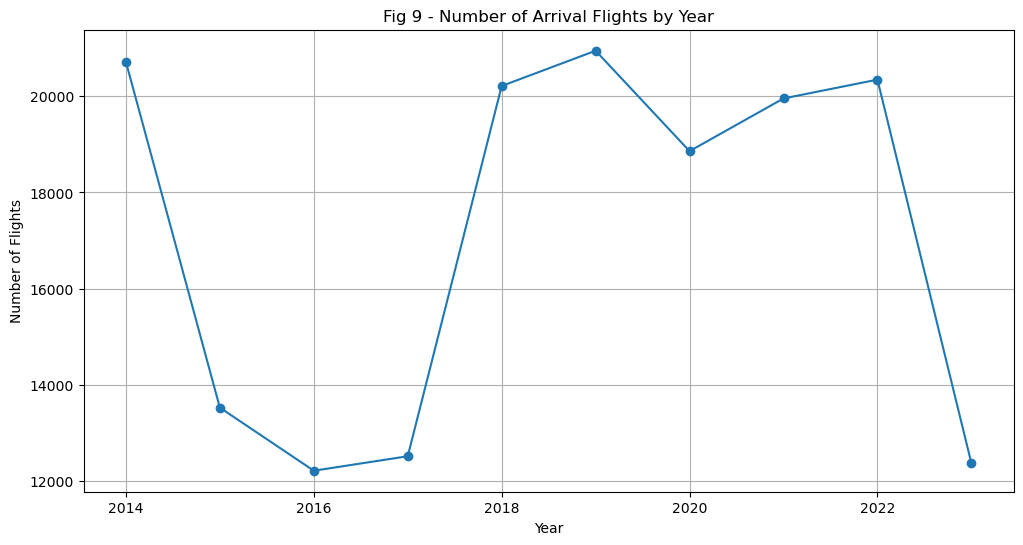

In [19]:
# Group the data by year and count the number of arrival flights for each year
flights_by_year = winsorized_df.groupby('year').size()

# Plot the data
plt.figure(num=9,figsize=(12, 6))
plt.plot(flights_by_year.index, flights_by_year.values, marker='o')
plt.title('Fig 9 - Number of Arrival Flights by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()

Fig 9 shows the number of arrival flights over 10 years. There is no common trend found over 10 years. The pattern looks highly unpredictable and many other factors also influence this. The highest number of arrival flights can be seen in the years 2014 & 2019 and the least seen in 2016.

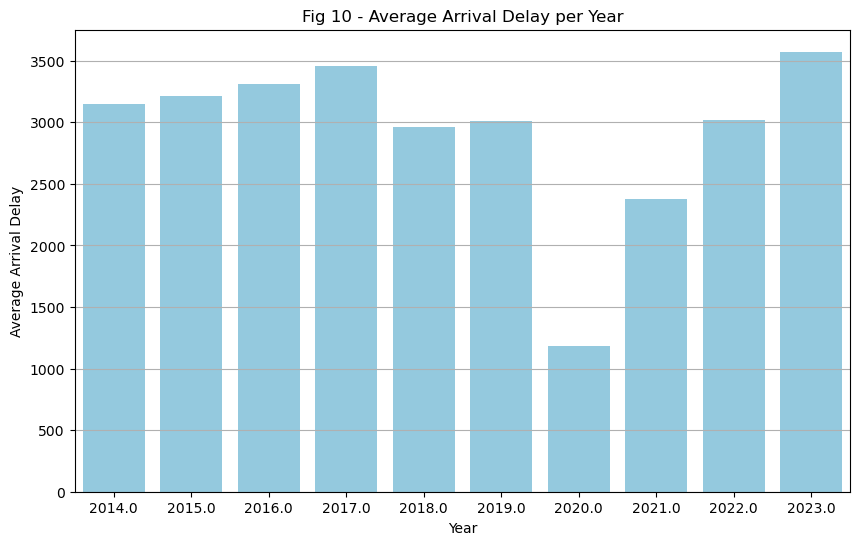

In [20]:
# Group the data by year and calculate the average arrival delay for each year
average_delay_per_year = winsorized_df.groupby('year')['arr_delay'].mean()

# Plot the average arrival delay for each year
plt.figure(num=10,figsize=(10, 6))
sns.barplot(x=average_delay_per_year.index, y=average_delay_per_year.values, color='skyblue')
plt.title('Fig 10 - Average Arrival Delay per Year')
plt.xlabel('Year')
plt.ylabel('Average Arrival Delay')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.show()


Fig 10 shows the average arrival delay every year across different airports in the U.S. In 2020 records significant low arrival delays showing good handling by the airport operational teams. And 2023 has high arrival delays in the 10 years.

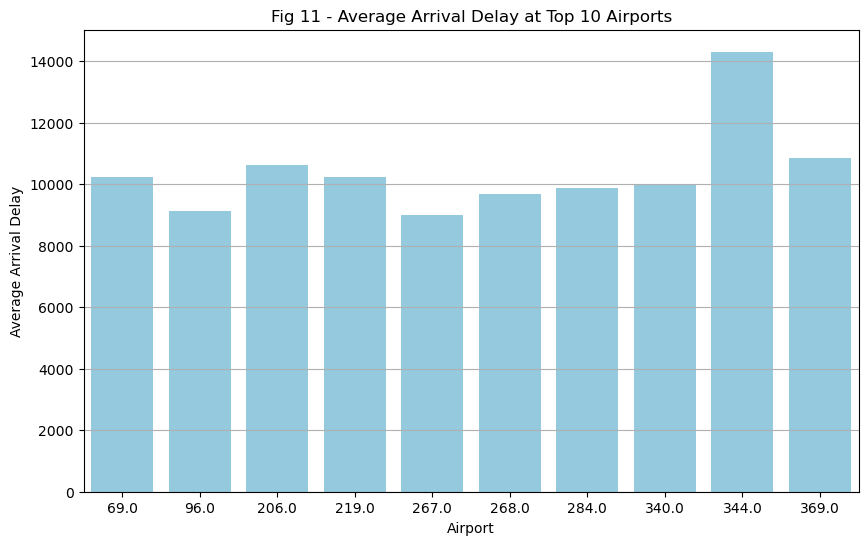

In [21]:
# Group the data by airport name and calculate the average arrival delay for top 10 airport
average_delay_per_airport = winsorized_df.groupby('airport_name')['arr_delay'].mean()

# Sort the airports based on the average arrival delay and select the top 10 airports
top_10_airports = average_delay_per_airport.sort_values(ascending=False).head(10)

# Plot the average arrival delay for the top 10 airports
plt.figure(num=11,figsize=(10, 6))
sns.barplot(x=top_10_airports.index, y=top_10_airports.values, color='skyblue')
plt.title('Fig 11 - Average Arrival Delay at Top 10 Airports')
plt.xlabel('Airport')
plt.ylabel('Average Arrival Delay')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.show()

Fig 11 shows the top 10 airports having the highest arrival delays. Since the airport name has undergone label encoding, they are labeled numerically. Airport 344 records the highest among all airports in the U.S.

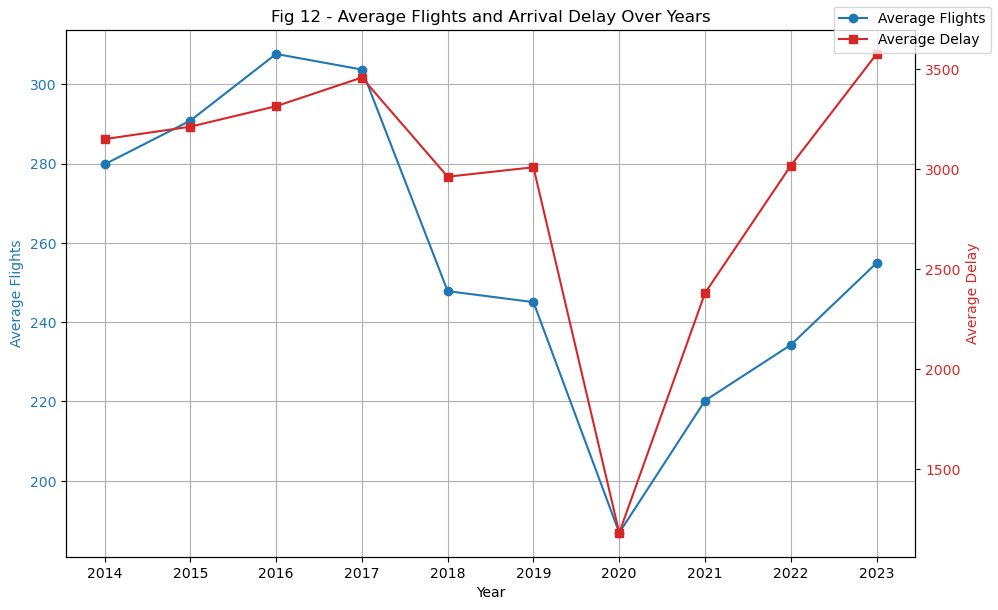

In [22]:
# Group the data by year and calculate the average number of flights and average arrival delay for each year
average_flights_per_year = winsorized_df.groupby('year')['arr_flights'].mean()
average_delay_per_year = winsorized_df.groupby('year')['arr_delay'].mean()

# Create a figure and axis object
fig, ax1 = plt.subplots(num=12,figsize=(10, 6))

# Plot the average number of flights over the years (using the first y-axis)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Flights', color=color)
ax1.plot(average_flights_per_year.index, average_flights_per_year.values, color=color, marker='o', label='Average Flights')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(average_flights_per_year.index)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Delay', color=color)
ax2.plot(average_delay_per_year.index, average_delay_per_year.values, color=color, marker='s', label='Average Delay')
ax2.tick_params(axis='y', labelcolor=color)

# Add gridlines
ax1.grid(True)

# Add legends
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.title('Fig 12 - Average Flights and Arrival Delay Over Years')
plt.show()


Fig 12 shows a pattern over 10 years of how average flights and arrival delays are more positively correlated.

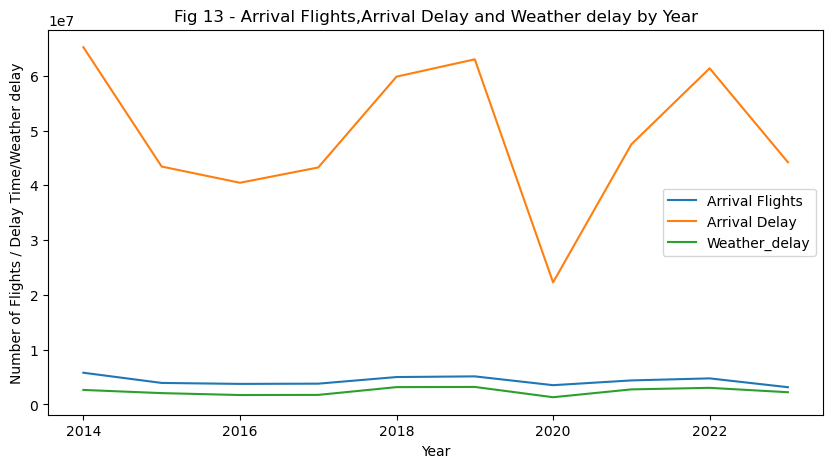

In [23]:

# Calculate the total arrival flights and arrival delay for each year
arrival_flights = winsorized_df.groupby('year')['arr_flights'].sum()
arrival_delay = winsorized_df.groupby('year')['arr_delay'].sum()
weather_delay = winsorized_df.groupby('year')['weather_delay'].sum()

# Create a new figure
plt.figure(num=13,figsize=(10, 5))

# Create a new subplot
ax = plt.subplot(111)

# Plot the arrival flights
ax.plot(arrival_flights.index, arrival_flights.values, label='Arrival Flights')

# Plot the arrival delay
ax.plot(arrival_delay.index, arrival_delay.values, label='Arrival Delay')

# Plot the weather_delay
ax.plot(weather_delay.index, weather_delay.values, label='Weather_delay')

# Set the title and labels
ax.set_title('Fig 13 - Arrival Flights,Arrival Delay and Weather delay by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Flights / Delay Time/Weather delay')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Fig 13 gives us an understanding of the relationship between arrival flights, arrival delay, and weather delay. This shows arrival delay cannot be influenced much due to weather delays or the number of flights.

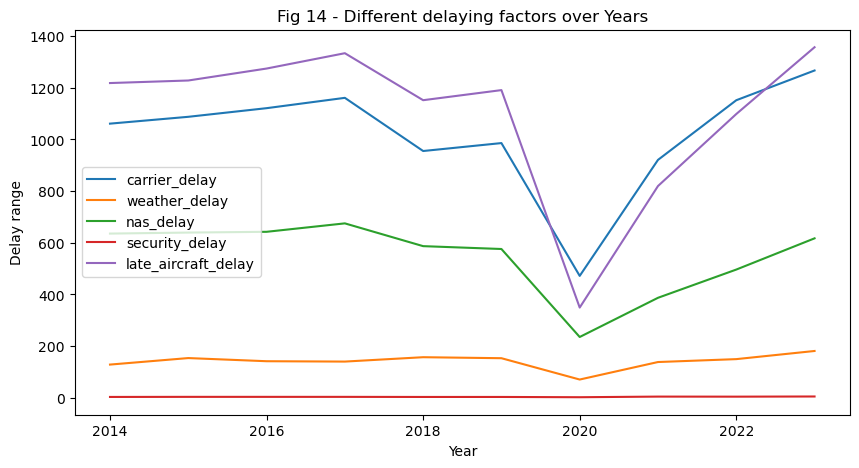

In [24]:
# Calculate the factors causing arrival delay for each year
carrier_delay = winsorized_df.groupby('year')['carrier_delay'].mean()
weather_delay = winsorized_df.groupby('year')['weather_delay'].mean()
nas_delay = winsorized_df.groupby('year')['nas_delay'].mean()
security_delay = winsorized_df.groupby('year')['security_delay'].mean()
late_aircraft_delay = winsorized_df.groupby('year')['late_aircraft_delay'].mean()

# Create a new figure
plt.figure(num=14,figsize=(10, 5))

# Create a new subplot
ax = plt.subplot(111)

# plot each variable
ax.plot(carrier_delay.index, carrier_delay.values, label='carrier_delay')
ax.plot(weather_delay.index, weather_delay.values, label='weather_delay')
ax.plot(nas_delay.index, nas_delay.values, label='nas_delay')
ax.plot(security_delay.index, security_delay.values, label='security_delay')
ax.plot(late_aircraft_delay.index, late_aircraft_delay.values, label='late_aircraft_delay')

# Set the title and labels
ax.set_title('Fig 14 - Different delaying factors over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Delay range')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Fig 14 shows categorize the delaying factors and shows their similarities and differences. carrier delay, late aircraft delay shows more likely similar trends. NAS (National Airspace System) delay is also likely to follow the same trend. whereas weather delays and security delays completely follow different patterns.

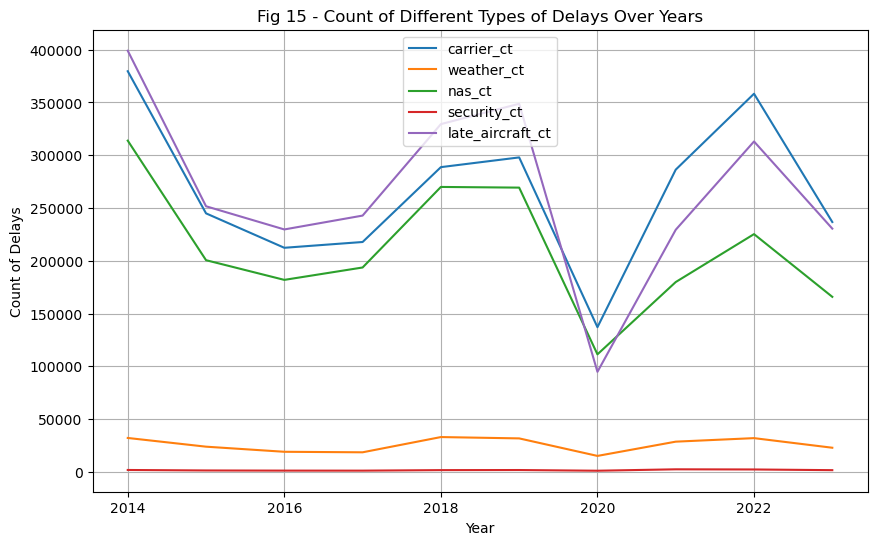

In [25]:
# Group the data by year and calculate the sum of each type of delay for each year
delays_per_year = winsorized_df.groupby('year')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Plotting
plt.figure(num=15,figsize=(10, 6))

# Loop through each type of delay and plot it
for column in delays_per_year.columns:
    plt.plot(delays_per_year.index, delays_per_year[column], label=column)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Delays')
plt.title('Fig 15 - Count of Different Types of Delays Over Years')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Fig 15 shows the count of delays due to weather, carrier, nas, security, and late aircraft. Here carrier, NAS, and late aircraft have similar trends in delay count. will weather and security counts as delay factors stay low, more unrelated to other delay factors. This clearly shows that the factors like weather and security contribute less than the other delaying factors.

All the above analysis shows us that the dataset has continuous and multiple variables that show a relationship with each other. This helps us to understand the different delaying factors contributing to the arrival delays in the last 10 years in U.S. airports.

#### Machine Learning Models

##### Linear Regression

The linear regression model is used in this dataset to find the relationship between independent and dependent variables. The above data analysis shows various relationships among the variables. To check their relationship with arrival delay, a regression model has been used. winsorized_df is the dataset used, independent variables (features), and the dependent variable (target).Assume arr_delay is the target variable, and the rest are features. Data has been split into training and test data 80:20 ratio to find the relationship between the feature and target variables.

In [26]:

# Assigning the features and the target
X = winsorized_df.drop('arr_delay', axis=1)
y = winsorized_df['arr_delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training data and the test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print R-squared,MSE,MAE,RMSE for both training and test sets
print("Training set R-squared:", r2_score(y_train, y_train_pred))
print("Test set R-squared:", r2_score(y_test, y_test_pred))

print("Training set MSE:", mean_squared_error(y_train, y_train_pred))
print("Test set MSE:", mean_squared_error(y_test, y_test_pred))

print("Training set MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test set MAE:", mean_absolute_error(y_test, y_test_pred))

print('Training set RMSE:',np.sqrt(mean_absolute_error(y_train, y_train_pred)))
print('Testset RMSE:',np.sqrt(mean_absolute_error(y_test, y_test_pred)))

Training set R-squared: 0.9948545058621906
Test set R-squared: 0.9951471676537279
Training set MSE: 106143.85674097847
Test set MSE: 97512.77871040367
Training set MAE: 100.67632031973778
Test set MAE: 98.13244243403274
Training set RMSE: 10.033759032373549
Testset RMSE: 9.906182031137563


The above metrics infer that the linear regression model performs well in predicting the arr_delay variable. The r-squared value of both the training and test set falls between the range 0 to 1 showing that the model fits the data well showing accurate predictions. The average absolute difference (MAE) between the actual and anticipated values is calculated. The model has minimal absolute prediction errors, as seen by the comparatively low MAE values for the training and test sets. The average prediction error is measured by the square root of the mean square error or RMSE. The model's ability to produce accurate predictions is further supported by the relatively low training and test RMSE values. The low MSE and MAE value indicates the accuracy of the model and the error ratio is significantly small. This model suggests that the arr_delay is highly predicted based on the features.

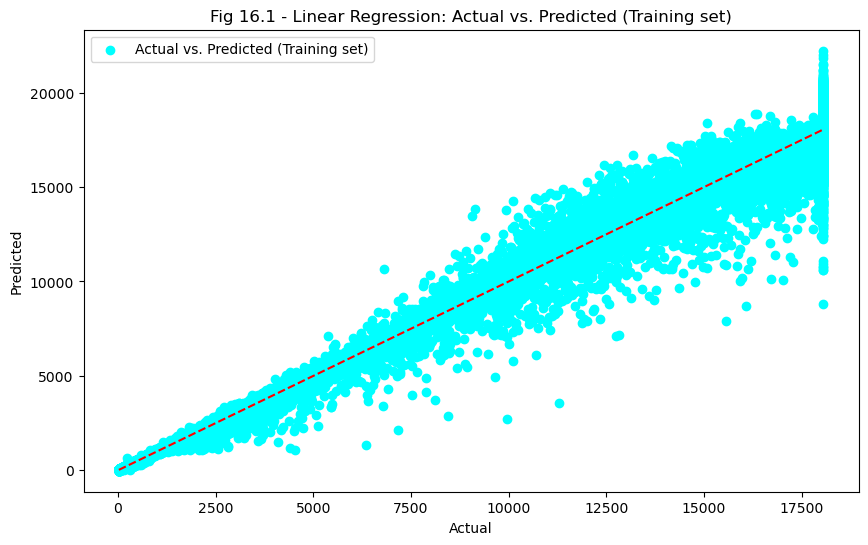

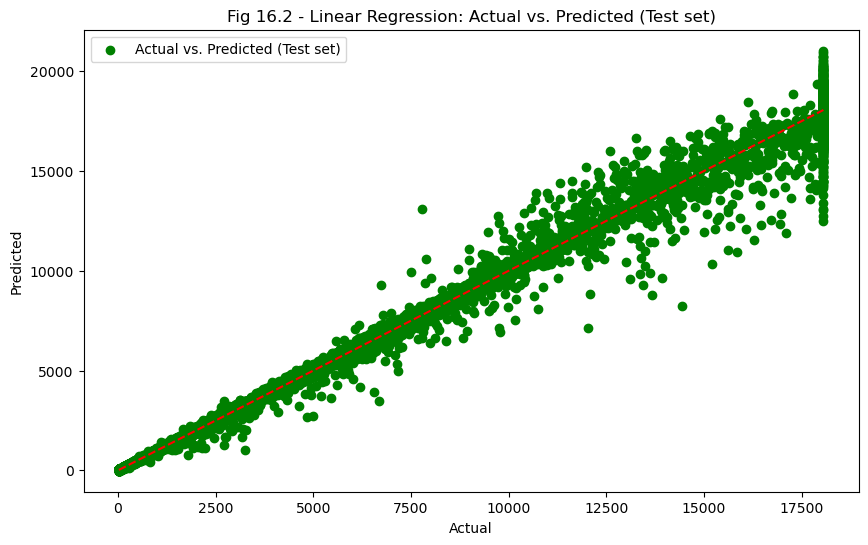

In [27]:
# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='cyan', label='Actual vs. Predicted (Training set)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fig 16.1 - Linear Regression: Actual vs. Predicted (Training set)')
plt.legend()
plt.show()

# Scatter plot for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs. Predicted (Test set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fig 16.2 - Linear Regression: Actual vs. Predicted (Test set)')
plt.legend()
plt.show()


Fig 16.1 and 16.2 show the actual vs predicted values of both the training and test data set. The red dotted line is the expected actual and predicted values of the model. All the data points are merged on the actual and predicted line and nearing the line leaving the requirement for model improvisation.

##### Gradient Bossing Regression

The Dataset is continuous and numeric, to improvise from the previous model, a Gradient Boosting regressor has been used. This model helps to provide high predictive accuracy compared to other machine learning models for this type of data. This model helps us to study the complex relationship of factors impacting flight arrival delays. As part of feature selection, high and moderate correlated features to arrival delay have been selected to improvise the close study of the factors impacting the arrival flight delays in U.S airports.

In [29]:
# Feature selection and target variable
X = winsorized_df[['arr_flights','arr_del15','carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct','arr_cancelled','arr_diverted',
                   'carrier_delay', 'weather_delay','nas_delay', 'security_delay','late_aircraft_delay', 'month', 'year']]# Features
y = winsorized_df['arr_delay']  # Target variable (arrival flight delay)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,random_state=42)

# Training the regressor
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict on the training set
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Evaluate performance on training set (e.g., using Mean Squared Error)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Training Mean Squared Error:", mse_train)

# Evaluate performance on test set (e.g., using Mean Squared Error)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error:", mse_test)

Mean Squared Error: 148550.48307113635
Training Mean Squared Error: 148030.48673014776
Test Mean Squared Error: 148550.48307113635


In [30]:
# To check the model fit
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9926072192913005


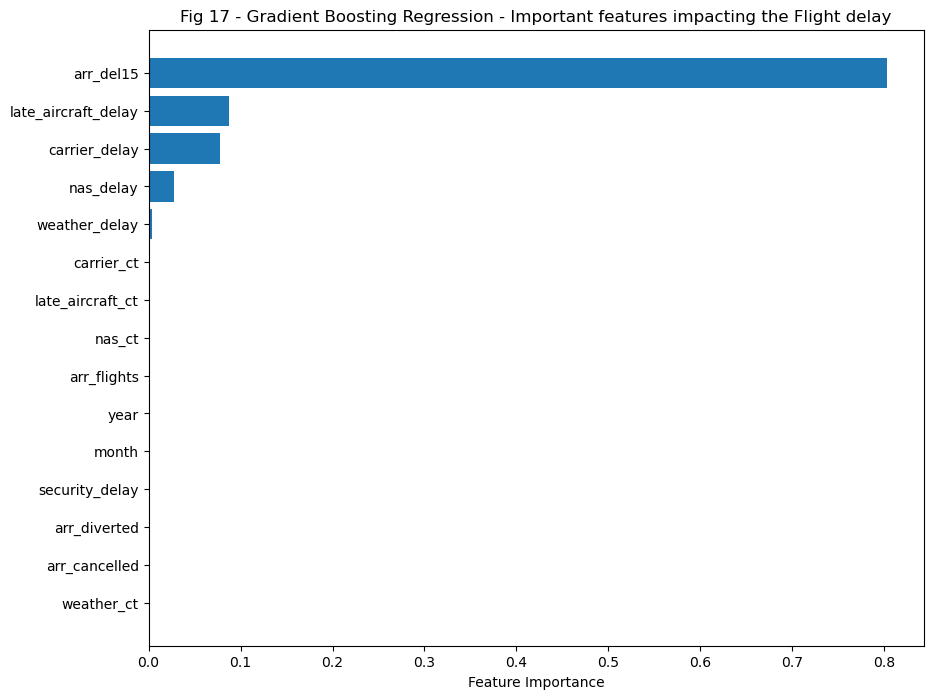

In [54]:
# Plot feature importances
feature_importances = gb_regressor.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(num=17,figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Fig 17 - Gradient Boosting Regression - Important features impacting the Flight delay')
plt.show()

The Gradient boosting Regressor model shows a high R square value of 99.226% showing variance in the dependent(target) variable explained by the independent variables (features). This shows that the data fits well in the model however since the MSE scores are higher, the model requires more areas of improvement to increase the better performance. According to the GBR model fig 16 shows the important features impacting the arrival delays are delayed arrival after 15 minutes, late aircraft delay, carrier delay, nas delay, and last weather delay. This will show you which features have the most importance in the model's predictions.

##### Light GBM

Light GBM is an effective approach to increase efficiency and scalability. Also, Light GBM has many hyperparameter tuning optimization options which will give flexibility to optimize the model more effectively. Here highly correlated features are used, excluding low correlated features. Further hyperparameter optimization is made by setting parameters with regularization techniques lamda1 and lamda2(L1 &L2), later cross-validation techniques are used to avoid the overfitting of data.

In [36]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Define the feature columns explicitly which has high and moderate correlated variables
feature_cols = ['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'carrier_delay', 'weather_delay', 'nas_delay',
                'security_delay', 'late_aircraft_delay']

# Extract features and target variable based on the defined feature columns
X = winsorized_df[feature_cols]  # Features
y = winsorized_df['arr_delay']    # Target variable (flight arrival delay time)

# Define parameters with regularization techniques and other hyperparameters
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 
    'metric': 'mse', 
    'num_leaves': 55, 
    'learning_rate': 0.09, 
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 5, 
    'verbose': 0, 
    'max_depth': 9, 
    'min_split_gain': 0.01, 
    'min_child_weight': 1, 
    'min_child_samples': 10, 
    'lambda_l1': 0.5,  # L1 regularization term
    'lambda_l2': 0.5  # L2 regularization term
}

# Performing cross-validation with manual early stopping
num_round = 500
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, vald_index in kf.split(X):
    X_train, X_vald = X.iloc[train_index], X.iloc[vald_index]
    y_train, y_vald = y.iloc[train_index], y.iloc[vald_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    vald_data = lgb.Dataset(X_vald, label=y_vald, reference=train_data)
    
    gbm = lgb.train(params, train_data, num_boost_round=num_round,
                    valid_sets=[train_data, vald_data])
    
    y_vald_pred = gbm.predict(X_vald, num_iteration=gbm.best_iteration)
    mse = mean_squared_error(y_vald, y_vald_pred)
    mse_scores.append(mse)

print("Mean Squared Error (Validation):", np.mean(mse_scores))

Mean Squared Error (Validation): 49546.18971146538


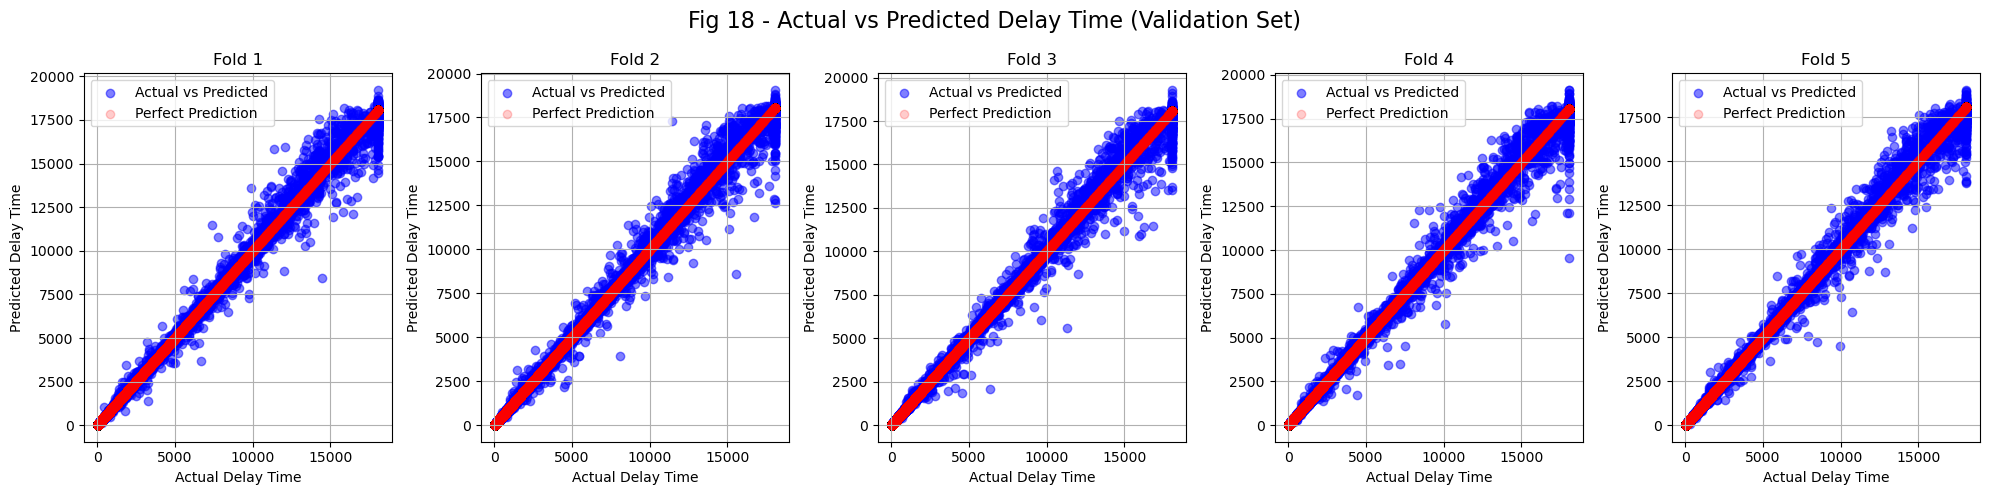

In [32]:
# Create a figure with 5 subplots (one for each fold)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# set the for loop on the training and validation set to dipict the position oftraining and validation sets in each fold.
for i, (train_index, vald_index) in enumerate(kf.split(X), 1):
    X_train, X_vald = X.iloc[train_index], X.iloc[vald_index]
    y_train, y_vald = y.iloc[train_index], y.iloc[vald_index]

    # Train the model on the training data
    train_data = lgb.Dataset(X_train, label=y_train)
    gbm = lgb.train(params, train_data, num_boost_round=num_round)

    # Predict on the validation set
    y_vald_pred = gbm.predict(X_vald, num_iteration=gbm.best_iteration)

    # Plot actual vs predicted values with different colors in each subplot
    axs[i-1].scatter(y_vald, y_vald_pred, alpha=0.5, c='blue', label='Actual vs Predicted')
    axs[i-1].scatter(y_vald, y_vald, alpha=0.2, c='red', label='Perfect Prediction')  # Actual vs Actual (Perfect Prediction)
    axs[i-1].set_xlabel("Actual Delay Time")
    axs[i-1].set_ylabel("Predicted Delay Time")
    axs[i-1].set_title(f"Fold {i}")
    axs[i-1].legend()
    axs[i-1].grid(True)
plt.suptitle("Fig 18 - Actual vs Predicted Delay Time (Validation Set)", fontsize=16)
plt.tight_layout()
plt.show()


The MSE value of 49546.18971146538 indicates the mean square error of the validation set. This measures the average of squares of the difference between predicted and actual values. Here MSE indicates how well the flight arrival delay is impacted by the factors in the validation set. Fig 18 shows the actual vs predicted value in each fold. the MSE value is minimized using the different hyperparameters such as number of leaves, learning rate, lamda L1&L2, n boost rounds, number of k folds, max depth, min of child samples, etc. These hyperparameters helped to increase the performance of this model.

arr_del15: 13669386932407.934
late_aircraft_delay: 1484587445507.3223
carrier_delay: 968000488946.7969
nas_delay: 178064388102.5078
weather_delay: 53128860937.10156
late_aircraft_ct: 13480879540.691406
nas_ct: 13218490112.298828
carrier_ct: 12896243692.798828
carrier: 7958603659.699219
weather_ct: 5866860356.2109375
arr_flights: 3830384591.5039062
airport: 2598567800.40625
year: 2557867342.59375
arr_cancelled: 2358696910.1953125
month: 1800901591.8945312
arr_diverted: 1168144297.8007812
security_delay: 597116370.0
security_ct: 544681912.5


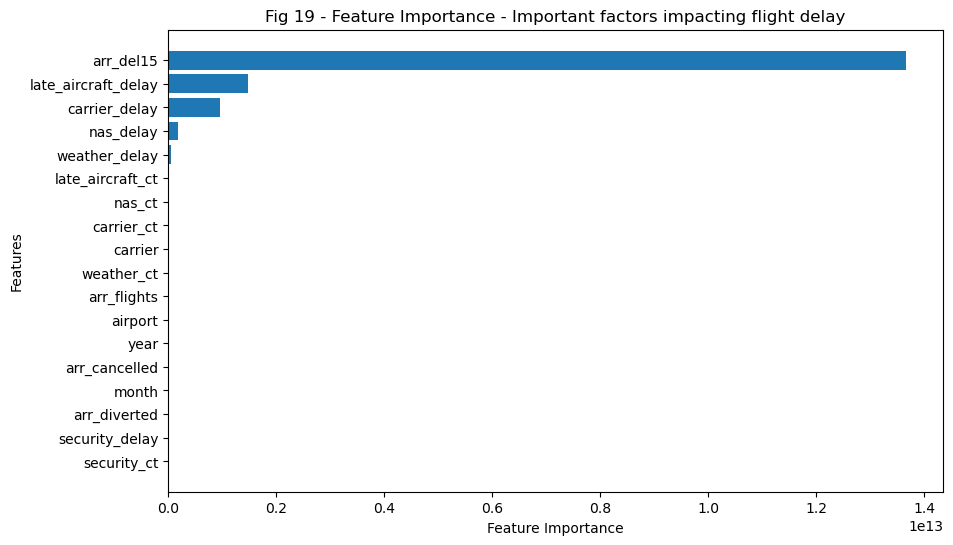

In [33]:
# Train the final model on the entire dataset
final_train_data = lgb.Dataset(X, label=y)
final_gbm = lgb.train(params, final_train_data, num_boost_round=num_round)

# Get feature importance
feature_importance = final_gbm.feature_importance(importance_type='gain')

# Create a dictionary of feature importance
feature_importance_dict = dict(zip(feature_cols, feature_importance))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# visualize the sorted feature importance
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.figure(num=19,figsize=(10, 6))
plt.barh(range(len(sorted_features)), [val for _, val in sorted_features], align='center')
plt.yticks(range(len(sorted_features)), [feat for feat, _ in sorted_features])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Fig 19 - Feature Importance - Important factors impacting flight delay')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest importance at the top
plt.show()

Fig 19 shows the important features impacting the arrival flight delay. This graph shows that prioritized factors and operational changes to reduce these delays will help to reduce the overall arrival flight delays in U.S. airports.

#### Conclusion

The factors highly impacting the arrival delays are arrivals after 15 minutes, followed by late aircraft delay, carrier delay, NAS delay, and least weather delay. The rest of the features do not contribute to the arrival flight delays in U.S. airports over the last 10 years. Though most of the features are multi-related. The flight and airport operation team should bring some better approach to reduce these five delaying factors which in turn reduces the overall arrival flight delays in U.S airports which will make their operational structure more effective and efficient.

#### References

In [ ]:
https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/data
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
https://medium.com/analytics-vidhya/modeling-flight-delays-through-u-s-flight-data-2f0b3d7e2c89
https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/#:~:text=A%20regression%20model%20can%20only,residuals%20as%20being%20a%20distance.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html
https://medium.com/analytics-vidhya/using-machine-learning-to-predict-flight-delays-e8a50b0bb64c
https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/